In [1]:
from __future__ import print_function

import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import json
from os import listdir
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import TensorBoard
from time import time
import keras.backend as K
from keras import metrics

C:\Users\bwink\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
def removeNone(input):
    data = []
    for i in input:
        temp = []
        for g in i:
            if g is None:
                temp.append(0)
            else:
                temp.append(g)
        data.append(temp)
    return data

In [3]:
train = json.loads(open('../train.json', 'r').read())
test = json.loads(open('../test.json', 'r').read())
current = json.loads(open('../current.json', 'r').read())
tickers = json.loads(open('../test.json', 'r').read())['ticker']

trainlength = len(train['growth'])
testlength = len(test['growth'])

x_train = removeNone(train['data'][:trainlength])
x_test = removeNone(test['data'])
currentData = removeNone(current['data'])
y_train = removeNone(np.array(train['growth']).reshape((trainlength, 1)).tolist())
y_test = removeNone(np.array(test['growth']).reshape((testlength, 1)).tolist())

In [4]:
xscaler = MinMaxScaler()
xscaler.fit(x_train + x_test)
x_train = xscaler.transform(x_train)
x_test = xscaler.transform(x_test)
currentData = xscaler.transform(currentData)

yscaler = MinMaxScaler()
yscaler.fit(y_train + y_test)
y_train = yscaler.transform(y_train)
y_test = yscaler.transform(y_test)

In [26]:
model = Sequential()

model.add(Dense(units=1024, activation='relu', input_dim=224))
model.add(Dense(units=512, activation='relu'))
model.add(Dense(units=256, activation='relu'))
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=1))

def mean_err():
    correct = yscaler.inverse_transform(y_test)
    pred = yscaler.inverse_transform(model.predict(x_test))
    averageError = 0;
    
    for i in range(424):
        averageError += abs(correct[i][0]/pred[i][0]-1)
        if i > 0:
            averageError = averageError/2
    return averageError

model.compile(loss='mean_squared_error', optimizer='adam')

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100000/100000 [47:29<00:00, 35.09it/s]


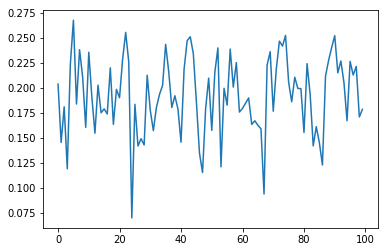

In [49]:
import matplotlib.pyplot as plt
from tqdm import tqdm

batchSize = 32
n_epochs = 100000
error = []

for i in tqdm(range(n_epochs)):
    indices = np.random.choice(y_test.shape[0], batchSize, replace=False)
    x_batch = x_train[indices, :]
    y_batch = y_train[indices, :]
    
    model.train_on_batch(x_batch, y_batch)
    error.append(mean_err())
plt.plot(error[1::n_epochs//100])

In [50]:
import operator

correct = yscaler.inverse_transform(y_test)

# pred = model.predict(x_test)
pred = yscaler.inverse_transform(model.predict(x_test))

averageError = 0;
predictions = {}
corrections = {}

for i in range(424):
    averageError += abs(correct[i][0]/pred[i][0]-1)
    if i > 0:
        averageError = averageError/2
    predictions[tickers[i]] = pred[i][0]
    corrections[tickers[i]] = correct[i][0]

    sortedItems = sorted(predictions.items(), key=operator.itemgetter(1))

average = 0    

for i in sortedItems[-10:]:
    print(i[0])
    print(corrections[i[0]])
    average += corrections[i[0]]

print(average/10)
print(averageError)

QCOM
0.969412477286493
SRCL
0.8845953682019255
FISV
1.2223154362416107
DE
1.5164228272454219
UNP
1.2842367362574219
DFS
1.0705636743215032
OKE
0.9218696102104175
APD
1.136524208630602
APC
0.7650834403080873
STT
1.256889003347927
1.102791278205141
0.12867182684299858


In [52]:
pred = yscaler.inverse_transform(model.predict(currentData))

predictions = {}

for i in range(424):
    predictions[tickers[i]] = pred[i][0]

sortedItems = sorted(predictions.items(), key=operator.itemgetter(1))

average = 0 

for i in sortedItems[-50:]:
    print(i[0])
    print(i[1])
    average += i[1]

print(average/50)

ATVI
1.2311457
HRS
1.2324238
PPL
1.232444
JNPR
1.2374096
AON
1.2384635
MDT
1.2393972
M
1.2438601
NBL
1.2452629
NEE
1.2473394
CTL
1.2502562
LKQ
1.251031
TMO
1.2688696
NTAP
1.2691314
MNST
1.2757492
RAI
1.2858943
HCP
1.2897803
NDAQ
1.294779
CCI
1.2973772
AN
1.2992839
AES
1.3092172
CMI
1.3467745
BBBY
1.3702456
PX
1.3959014
GWW
1.403254
GOOG
1.4038312
GPC
1.4038312
CAG
1.4072461
TROW
1.4105209
FLIR
1.4169111
DGX
1.417165
PPG
1.4496684
EXR
1.4923007
MKC
1.4981462
FLS
1.5351888
CMCSA
1.5766361
CERN
1.59084
EFX
1.6466588
TGT
1.6981512
ABT
1.7163519
HIG
1.8006451
NUE
1.8386861
HP
1.8656292
CPB
1.9802672
IVZ
2.1174061
EXPD
2.1878636
COO
2.2674916
PFG
3.0755858
AET
3.355581
AGN
3.355581
HUM
4.6570015
1.6384095406532289
